# Lineare Abbildungen

## Inhalt
* [Drehung](#Drehung)
* [Spiegelung](#Spiegelung)
* [Basiswechsel](#Basiswechsel)



**Lineare Abbildung**

Seien $K$-Vektorräume $V$ und $W$ gegeben. Eine Abbildung 
$$ F: \ V \rightarrow \ W $$                                                                  
heißt *linear*, falls für $v,w\in V$ und $\lambda \in K$ gilt:                    

* (L1) $F(v+w)=F(v)+F(w)$                                                               
* (L2) $F(\lambda \cdot v)=\lambda \cdot F(v)$                                          

* *Isomorphismus*: $F$ bijektiv. 
* *Endomorphismus*: $V=W$. 
* *Automorphismus*: $V=W$ und $F$ bijektiv. 

Bemerkungen:

* Sei $(v_i)_{i\in I}$ eine Basis in $V$ und $(w_i)_{i\in I}$                             
seien Vektoren in $W$. Dann gibt es genau eine lineare Abbildung $F:V                         
\rightarrow W$ mit $F(v_i)=w_i$ für alle $i \in I$.                                           
* *Bild* von $F$:   $\mathop{Im}(F) = F(V):=\{ F(v), v \in V \}$.             
* *Kern* von F: $\mathop{Ker}(F):=\{v \ \in V \ | \ F(v)=0 \}$                
* Kern und Bild sind Untervektorräume.                                                    
* Dimensionsformel:                                                                       
$$\dim V = \dim F(V) + \dim Ker(F)$$
* $\operatorname{Hom}_K(V,W)$: Die Menge der linearen Abbildungen von $V$ nach $W$. Sie ist ein Vektorraum durch punktweise Addition und Skalarmultiplikation.                    

#### Lineare Abbildungen und Matrizen

* Jeder Matrix $A \in K^{m \times n}$ läßt sich durch                                     
$$                                                                                           
 L_A: K^n \rightarrow K^m,\;                                                                  
\begin{pmatrix}                                                                               
 x_1\\                                                                                        
\vdots\\                                                                                      
x_n                                                                                           
\end{pmatrix}                                                                                 
\longmapsto                                                                                   
A                                                                                             
\begin{pmatrix}                                                                               
 x_1\\                                                                                        
\vdots\\                                                                                      
x_n                                                                                           
\end{pmatrix}                                                                                 
$$                                                                                            
eine lineare Abbildung zuordnen.                                                              
* Es gilt $\operatorname{dim}(L_A(K^m))=\operatorname{Rang}(A)$.                          


### Drehung
Drehung um den Winkel $\alpha$ - Drehmatrix $G$:
$$G(\alpha):= \left ( \begin{array}{cc} \cos(\alpha) & -\sin(\alpha) \\ \sin(\alpha) & \cos(\alpha)\end{array} \right)$$

In [1]:
var('a,y');
A = matrix([[cos(a),-sin(a)],[sin(a),cos(a)]])
show(A)

[ cos(a) -sin(a)]
[ sin(a)  cos(a)]

allgemeine Dreh-Formel  

In [1]:
vec = vector([x,y])
A*vec

(x*cos(a) - y*sin(a), y*cos(a) + x*sin(a))

Drehen um 90&deg;  

In [1]:
A(a=pi/2)*vector([1,1])

(-1, 1)

Drehen um 180&deg;  

In [1]:
A(a=pi)*vector([1,1])

(-1, -1)

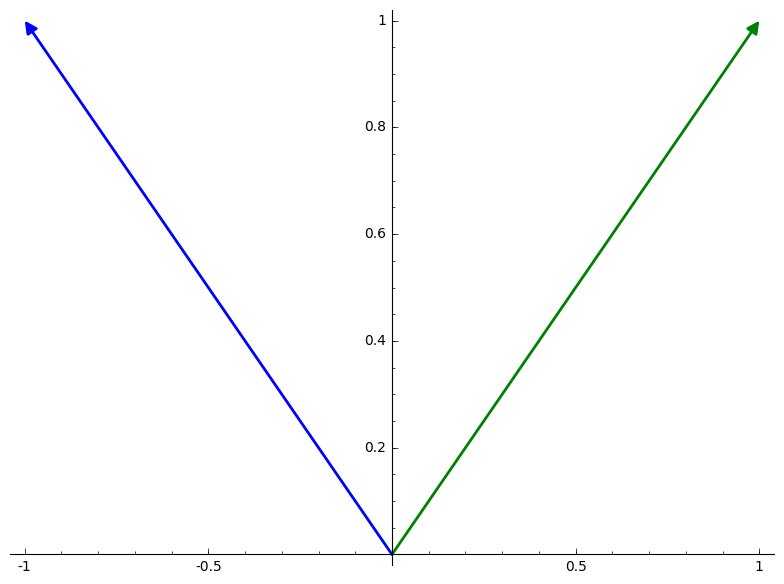

In [1]:
plot(vector([1,1]),color='green')+plot(A(a=pi/2)*vector([1,1]))

### Spiegelung
Spiegelung bez&uuml;glich der Ebene
$$H(a):=\{ x \in \mathbb{R}^3 | x^T a=0 \}, a \in \mathbb{R}^3 , \|a\|=1$$ 
durch 
$$S(a):=I - 2 a a^T.$$

In [1]:
def spiegelmatrix(a):
    a = a/a.norm(2)
    I_n = identity_matrix(3)
    S = I_n - 2*a.tensor_product(a)
    return S

w&auml;hle $a$  

In [1]:
a = vector([1/2,1,3/4])

orthogonaler Vektor  

In [1]:
ortha = vector([(-a[2] -a[1])/a[0],1,1]); ortha

(-7/2, 1, 1)

In [1]:
a*ortha

0

alternative Berechnung f&uuml;r orthogonalen Vektor  

In [1]:
ortha2 = a.cross_product(ortha); ortha2

(1/4, -25/8, 4)

In [1]:
a*ortha2

0

$ aa^T$  

In [1]:
a.tensor_product(a), matrix(3,1,a.list())*matrix(1,3,a.list())

(
[ 1/4  1/2  3/8]  [ 1/4  1/2  3/8]
[ 1/2    1  3/4]  [ 1/2    1  3/4]
[ 3/8  3/4 9/16], [ 3/8  3/4 9/16]
)

In [1]:
S = spiegelmatrix(a); S

[ 21/29 -16/29 -12/29]
[-16/29  -3/29 -24/29]
[-12/29 -24/29  11/29]

In [1]:
vec = vector([1,1,1])
svec = S*vec; svec

(-7/29, -43/29, -25/29)

In [1]:
from sageplotly import *

var('l,m') 

p = parametricplot_ly(l*ortha+m*ortha2,(l,-0.5,0.5),(m,-0.5,0.5)) #ebene
p4 = parametricplotline_ly(l*(-vec+svec)+vec,(l,0,1)) #Vektor und gespiegelter Vektor
p3 = parametricplotline_ly(l*svec,(l,0,1)) #gespiegelter Vektor
p2 = parametricplotline_ly(l*vec,(l,0,1)) #Vektor
ishow3d([p,p2,p3,p4])


### Basiswechsel 
Sei $V$ ein $K$-Vektorraum mit Basis $\mathcal{V}=(v_1, \dots ,v_n)$.<br /> 

* Die lineare Abbildung $\Phi_\mathcal{V}:K^n \ \rightarrow \ V$ mit $$\Phi_\mathcal{V}(x_1,\dots ,x_n)=x_1v_1+ \dots +x_nv_n$$ ist ein Isomorphismus. Man nennt $\Phi_\mathcal{V}$ ein <strong>Koordinatensystem</strong> in $V$ und $x=(x_1,\dots ,x_n)=\Phi_\mathcal{V}^{-1}(v)$ den <strong>Koordinatenvektor</strong> zu $v \in V$.
* Basiswechselabbildung von $\mathcal{V}$ nach Basis $\mathcal{Z}$: $T:= \Phi_\mathcal{Z}^{-1} \circ \Phi_\mathcal{V}$


Koordinatensystem V  

In [1]:
v1 = vector([1,0,0])
v2 = vector([0,1,0])
v3 = vector([0,0,1])

In [1]:
span([v1,v2,v3])

Free module of degree 3 and rank 3 over Integer Ring
Echelon basis matrix:
[1 0 0]
[0 1 0]
[0 0 1]

Koordinatensystem Z  

In [1]:
z1 = vector([1,1,1])
z2 = vector([1,0,1])
z3 = vector([1,0,0])

In [1]:
span([z1,z2,z3])

Free module of degree 3 and rank 3 over Integer Ring
Echelon basis matrix:
[1 0 0]
[0 1 0]
[0 0 1]

Koordinatenvektor  

In [1]:
vec = vector([1,1,1])

In [1]:
phiv = vec[0]*v1+vec[1]*v2+vec[2]*v3; phiv

(1, 1, 1)

In [1]:
phiv = matrix([v1,v2,v3]).transpose(); phiv

[1 0 0]
[0 1 0]
[0 0 1]

In [1]:
phiz = matrix([z1,z2,z3]).transpose(); phiz

[1 1 1]
[1 0 0]
[1 1 0]

Basiswechselabbildung  

In [1]:
T = phiz.inverse()*phiv ; T

[ 0  1  0]
[ 0 -1  1]
[ 1  0 -1]

In [1]:
T*vector([1,1,1])

(1, 0, 0)